![dphi banner](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/dphi_banner.png)

<h1 style="font-size:40px;">Data Sprint 61 - Meteorite Threat Identification.<h1><h2> solution by innocent_charles @dphi<h2>

<h1>AUTHOR PROFILE</h1>
<h3>Name: Innocent Charles </h3>
<h3>linkedin Link : <a href="https://www.linkedin.com/in/innocent-charles-329194214/">Linkedin</a></h3>
<h3>Github Link : <a href="https://github.com/innocoder-official">Github Account</a></h3>

<h1>PROBLEM STATEMENT <h1>
<h3>A meteorite is a solid piece of debris from an object, such as a comet, asteroid, or meteoroid, that originates in outer space.To date, Nearly 28,000 near-Earth objects have been discovered by survey telescopes in close proximity to the Earth, with roughly 3,000 new discoveries every year. Sometimes, these meteors come very close to Earth’s future position and, because of small uncertainties in their positions, a future Earth impact cannot be completely ruled out. The last time a big meteorite crashed into Earth, it changed the climatic conditions so dramatically that it lead to the extinction of dinosaurs from Planet Earth.

 

Scientists have been studying about meteorites for a long time. The scientists have realized that applying Machine learning can help them identify the threats much more efficiently, 

 

A Task is to build a Machine Learning model that predicts whether or not an asteroid will be dangerous (or not!).<h3>


<h2>Methods and Techniques Used</h2>


* What is  the  type of the Machine learning does this problem is? - Classification,Supervised Learning.

* The problem has imbalanced dataset therefore , i decided to use StratifiedKfold cross validation split technique to handle this.

*  i have used LGBMClassifier , a Boosting algorithm  to build the model . 


<h2>IMPORTING THE IMPORTANT PACKAGES <h2>

In [265]:
#importing the library for doing machine learning 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pickle
from sklearn.model_selection import  StratifiedKFold
from lightgbm import  LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  classification_report
from sklearn.metrics import  accuracy_score
import matplotlib_inline
import logging
import warnings
warnings.filterwarnings("ignore")
logger=logging.getLogger()
logger.setLevel(logging.WARNING)
pd.set_option("display.max_columns",70000)
pd.set_option("display.max_rows",None)
pd.set_option("display.width",9000)
sns.set_style("whitegrid")

In [266]:
#loading the dataset 
train_data=pd.read_csv("../Data/train_dataset.csv") #loading train dataset 
test_data=pd.read_csv("../Data/test_dataset.csv")  #loading test dataset 
description=pd.read_csv("../Data/Data_description.txt") # description about the data 
sub=test_data.copy()     #copying th test data set to sub that will help to make submission file

<h2>EXPLORATORY DATA ANALYSIS</h2>

In [267]:
#custom function to do some EDA, checking head , tail and shape of the data 
class printData:
    def printTail(data):
        return data.tail()

    def printHead(data):
        return data.head()
        
    def checkShape(data):
        return data.shape

In [268]:
#checking the  first five columns of the train data ! Oops , there are so many features , this is fun !! 
head=printData.printHead(train_data)
head

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,26.6,0.012722,0.028447,12.721988,28.447230,0.007905,0.017676,41.738807,93.330809,7.648194,27533.497489,17108.244592,0.001808,0.703481,2.705378e+05,1.681044e+05,11,6,0.001983,5.479,2458000.5,0.217360,1.137455,7.583001,347.475804,443.098049,0.890218,245.671594,1.384692,2.457846e+06,125.647826,0.812461,0
1,22.7,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,19.142824,68914.168040,42820.584025,0.367221,142.848846,5.493543e+07,3.413530e+07,14,6,0.014937,3.556,2458000.5,0.530052,2.094837,4.710039,176.203926,1107.448956,0.984464,175.628191,3.205210,2.457653e+06,113.100725,0.325071,0
2,24.0,0.042126,0.094198,42.126461,94.197631,0.026176,0.058532,138.210178,309.047354,7.819970,28151.891054,17492.490305,0.000228,0.088548,3.405277e+04,2.115941e+04,80,0,0.001724,6.532,2458000.5,0.089348,0.910284,11.609153,146.961250,317.222445,0.828952,195.589585,0.991616,2.458100e+06,246.773198,1.134850,0
3,17.7,0.766576,1.714115,766.575574,1714.115092,0.476328,1.065101,2515.011805,5623.737359,2.335267,8406.960142,5223.758095,0.354676,137.969025,5.305880e+07,3.296921e+07,121,0,0.306679,3.740,2458000.5,0.371428,2.004001,7.012588,354.475923,1036.204307,1.259659,105.208870,2.748343,2.457681e+06,111.130550,0.347422,0
4,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,30.994787,111581.231488,69332.237977,0.420673,163.641815,6.293179e+07,3.910400e+07,8,7,0.381816,2.196,2458000.5,0.611155,3.284547,60.900589,219.323712,2174.260704,1.277179,218.504766,5.291914,2.458459e+06,284.064157,0.165574,0


In [269]:
##checking the last five columns of the train data
tail=printData.printTail(train_data)
tail

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
3275,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,24.155625,86960.248486,54033.716622,0.489395,190.374817,73212512.0,45492144.0,13,8,0.040377,4.343,2454778.5,0.415224,1.550930,5.855362,232.155178,705.483234,0.906946,109.237999,2.194914,2.454727e+06,26.531272,0.510289,0
3276,27.300,0.009216,0.020608,9.216265,20.608196,0.005727,0.012805,30.237092,67.612194,14.509560,52234.417405,32456.435637,0.312052,121.388351,46682360.0,29007074.0,9,7,0.010970,5.266,2458000.5,0.236383,1.193140,13.442772,304.342483,476.031102,0.911101,236.618185,1.475178,2.458158e+06,240.794163,0.756253,0
3277,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,851.187094,1.956978,7045.121994,4377.564830,0.237939,92.558449,35595236.0,22117854.0,13,1,0.219831,3.964,2458000.5,0.340682,1.823870,3.533539,0.907558,899.682406,1.202510,142.889139,2.445230,2.458115e+06,314.319554,0.400141,0
3278,24.786,0.029333,0.065590,29.332898,65.590355,0.018227,0.040756,96.236546,215.191459,22.041172,79348.219229,49303.897665,0.402279,156.486511,60180076.0,37394164.0,3,7,0.006670,6.182,2458000.5,0.332342,0.967444,9.048140,340.230154,347.566153,0.645922,113.680330,1.288967,2.458073e+06,284.853083,1.035774,0
3279,21.700,0.121494,0.271669,121.494041,271.668934,0.075493,0.168807,398.602509,891.302306,21.490725,77366.610509,48072.603069,0.258222,100.448448,38629496.0,24003256.0,14,6,0.097782,4.717,2458000.5,0.174449,1.316215,39.552965,51.236021,551.555058,1.086602,359.675847,1.545828,2.458257e+06,192.290111,0.652700,0


In [270]:
#checking the first five columns of the test data ! It does not have target column as train is because this is test data
#therefore after creating the model , we have to predict it's target column. 
head_test=printData.printHead(test_data)
head_test

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,25.1,0.025384,0.056760,25.383703,56.759685,0.015773,0.035269,83.279868,186.219446,4.581412,16493.084293,10248.161182,0.176349,68.599678,26381404.0,16392644.0,7,3,0.025396,6.258,2458000.5,0.182807,0.960067,6.856692,196.306187,343.597890,0.784560,128.552100,1.135574,2.457956e+06,46.850634,1.047736
1,20.6,0.201630,0.450858,201.629919,450.858206,0.125287,0.280150,661.515505,1479.193637,29.759711,107134.958747,66569.497006,0.145379,56.552307,21748342.0,13513793.0,29,0,0.034667,4.638,2454749.5,0.738662,1.313190,3.908082,3.756316,549.654306,0.343186,271.386905,2.283193,2.454734e+06,10.117600,0.654957
2,23.7,0.048368,0.108153,48.367649,108.153351,0.030054,0.067203,158.686517,354.833839,8.778408,31602.267857,19636.420269,0.034218,13.310944,5118994.5,3180795.5,13,7,0.031394,2.963,2458000.5,0.642603,2.829978,5.858230,157.020347,1738.893236,1.011426,344.511853,4.648529,2.458717e+06,211.595601,0.207028
3,18.4,0.555335,1.241767,555.334912,1241.766613,0.345069,0.771598,1821.964991,4074.037573,11.858580,42690.889350,26526.458441,0.313142,121.812263,46845384.0,29108374.0,92,0,0.065960,5.338,2458000.5,0.474092,1.153596,4.159055,337.201487,452.562947,0.606685,168.443407,1.700507,2.458040e+06,328.724516,0.795469
4,19.3,0.366906,0.820427,366.906138,820.427065,0.227985,0.509790,1203.760332,2691.689932,15.185391,54667.407014,33968.200764,0.383369,149.130737,57351264.0,35636424.0,23,0,0.132537,4.762,2458000.5,0.372837,1.342777,19.822195,64.003749,568.335056,0.842140,151.941979,1.843415,2.457925e+06,47.816955,0.633429


In [271]:
#checking the  last five columns of the test data
tail_test=printData.printTail(test_data)
tail_test

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
1402,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,8.976896,32316.826615,20080.419293,0.404599,157.389023,60527156.0,37609832.0,13,2,0.318512,4.806,2458000.5,0.069502,1.360875,15.622692,233.882145,579.863240,1.266291,84.042217,1.455458,2.458004e+06,357.851605,0.620836
1403,28.609,0.005044,0.011278,5.043767,11.278205,0.003134,0.007008,16.547791,37.001986,6.448936,23216.170459,14425.625472,0.136062,52.928185,20354612.0,12647769.0,4,6,0.005934,5.539,2458000.5,0.133281,1.126907,2.325254,165.331076,436.948895,0.976712,323.131581,1.277102,2.457785e+06,177.887009,0.823895
1404,23.200,0.060891,0.136157,60.891262,136.157002,0.037836,0.084604,199.774489,446.709337,9.988081,35957.092449,22342.338916,0.145078,56.435291,21703340.0,13485831.0,11,4,0.008185,6.673,2458000.5,0.450271,0.875904,1.099099,177.552666,299.421683,0.481510,104.895068,1.270298,2.458130e+06,204.008596,1.202318
1405,19.400,0.350393,0.783502,350.392641,783.501764,0.217724,0.486845,1149.582193,2570.543928,17.293566,62256.837642,38683.977811,0.487905,189.795227,72989624.0,45353648.0,51,0,0.082088,6.471,2458000.5,0.392936,0.906588,17.608417,11.232237,315.292486,0.550358,214.034151,1.262819,2.458065e+06,286.569530,1.141797
1406,21.900,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,11.101584,39965.701937,24833.132962,0.272437,105.977814,40755924.0,25324558.0,5,5,0.099135,3.477,2458000.5,0.496757,2.208482,7.595801,127.472514,1198.779061,1.111402,166.372735,3.305562,2.457571e+06,128.908519,0.300306


In [272]:
description #checking the description about the features 

,-Neo Reference ID: This feature denotes the reference ID assigned to an asteroid.
0,-Name: This feature denotes the name given to ...
1,-Absolute Magnitude: denotes the absolute mag...
2,-Est Dia in KM(min) - estimated diameter of th...
3,-Relative Velocity km per sec: This feature de...
4,-Orbiting Body: This feature denotes the plane...
5,-Eccentricity: denotes the value of eccentrici...
6,-Semi Major Axis: denotes the value of the Sem...
7,-Orbital Period: refers to the time taken by t...
8,-Perihelion Distance: denotes the point of lea...
9,-Aphelion Dist: denotes the point of greatest ...


In [273]:
description_data=description['-Neo Reference ID: This feature denotes the reference ID assigned to an asteroid.']
description_data #checking description about the features

0     -Name: This feature denotes the name given to ...
1     -Absolute Magnitude:  denotes the absolute mag...
2     -Est Dia in KM(min) - estimated diameter of th...
3     -Relative Velocity km per sec: This feature de...
4     -Orbiting Body: This feature denotes the plane...
5     -Eccentricity: denotes the value of eccentrici...
6     -Semi Major Axis: denotes the value of the Sem...
7     -Orbital Period: refers to the time taken by t...
8     -Perihelion Distance: denotes the point of lea...
9     -Aphelion Dist: denotes the point of greatest ...
10    -Hazardous: helps us identify whether meteorit...
Name: -Neo Reference ID: This feature denotes the reference ID assigned to an asteroid., dtype: object

In [274]:
#printing the dimensions of the train and test datasets 
train_data_shape=printData.checkShape(train_data) #train data 
test_data_shape=printData.checkShape(test_data) #test data 
train_data_shape , test_data_shape

((3280, 33), (1407, 32))

In [275]:
#checking the information to obtain some inferences from the datasets for train data  ! Boom , there are all numericals , no need of encoding here ! 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            3280 non-null   float64
 1   Est Dia in KM(min)            3280 non-null   float64
 2   Est Dia in KM(max)            3280 non-null   float64
 3   Est Dia in M(min)             3280 non-null   float64
 4   Est Dia in M(max)             3280 non-null   float64
 5   Est Dia in Miles(min)         3280 non-null   float64
 6   Est Dia in Miles(max)         3280 non-null   float64
 7   Est Dia in Feet(min)          3280 non-null   float64
 8   Est Dia in Feet(max)          3280 non-null   float64
 9   Relative Velocity km per sec  3280 non-null   float64
 10  Relative Velocity km per hr   3280 non-null   float64
 11  Miles per hour                3280 non-null   float64
 12  Miss Dist.(Astronomical)      3280 non-null   float64
 13  Mis

In [276]:
#checking the information to obtain some inferences from the datasets for test data  ! Boom , there are all numericals , no need of encoding here ! 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            1407 non-null   float64
 1   Est Dia in KM(min)            1407 non-null   float64
 2   Est Dia in KM(max)            1407 non-null   float64
 3   Est Dia in M(min)             1407 non-null   float64
 4   Est Dia in M(max)             1407 non-null   float64
 5   Est Dia in Miles(min)         1407 non-null   float64
 6   Est Dia in Miles(max)         1407 non-null   float64
 7   Est Dia in Feet(min)          1407 non-null   float64
 8   Est Dia in Feet(max)          1407 non-null   float64
 9   Relative Velocity km per sec  1407 non-null   float64
 10  Relative Velocity km per hr   1407 non-null   float64
 11  Miles per hour                1407 non-null   float64
 12  Miss Dist.(Astronomical)      1407 non-null   float64
 13  Mis

In [277]:
#checking the null values from the datasets for train data  ! Boom , there is no null values! 
train_data.isnull().sum()

Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbit ID                        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Tim

In [278]:
#checking the null values from the datasets for test data  ! Boom , there is no null values! 
test_data.isnull().sum()

Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbit ID                        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Tim

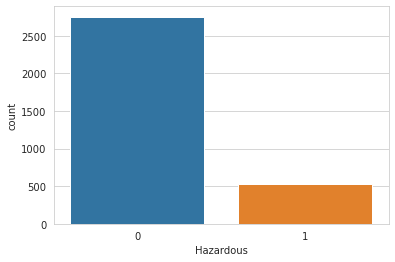

In [279]:
#checking the distribution of the target values ! This show the dataset is imbalanced , so many features represent not harzadous (0)
sns.countplot(train_data['Hazardous'])
plt.show()

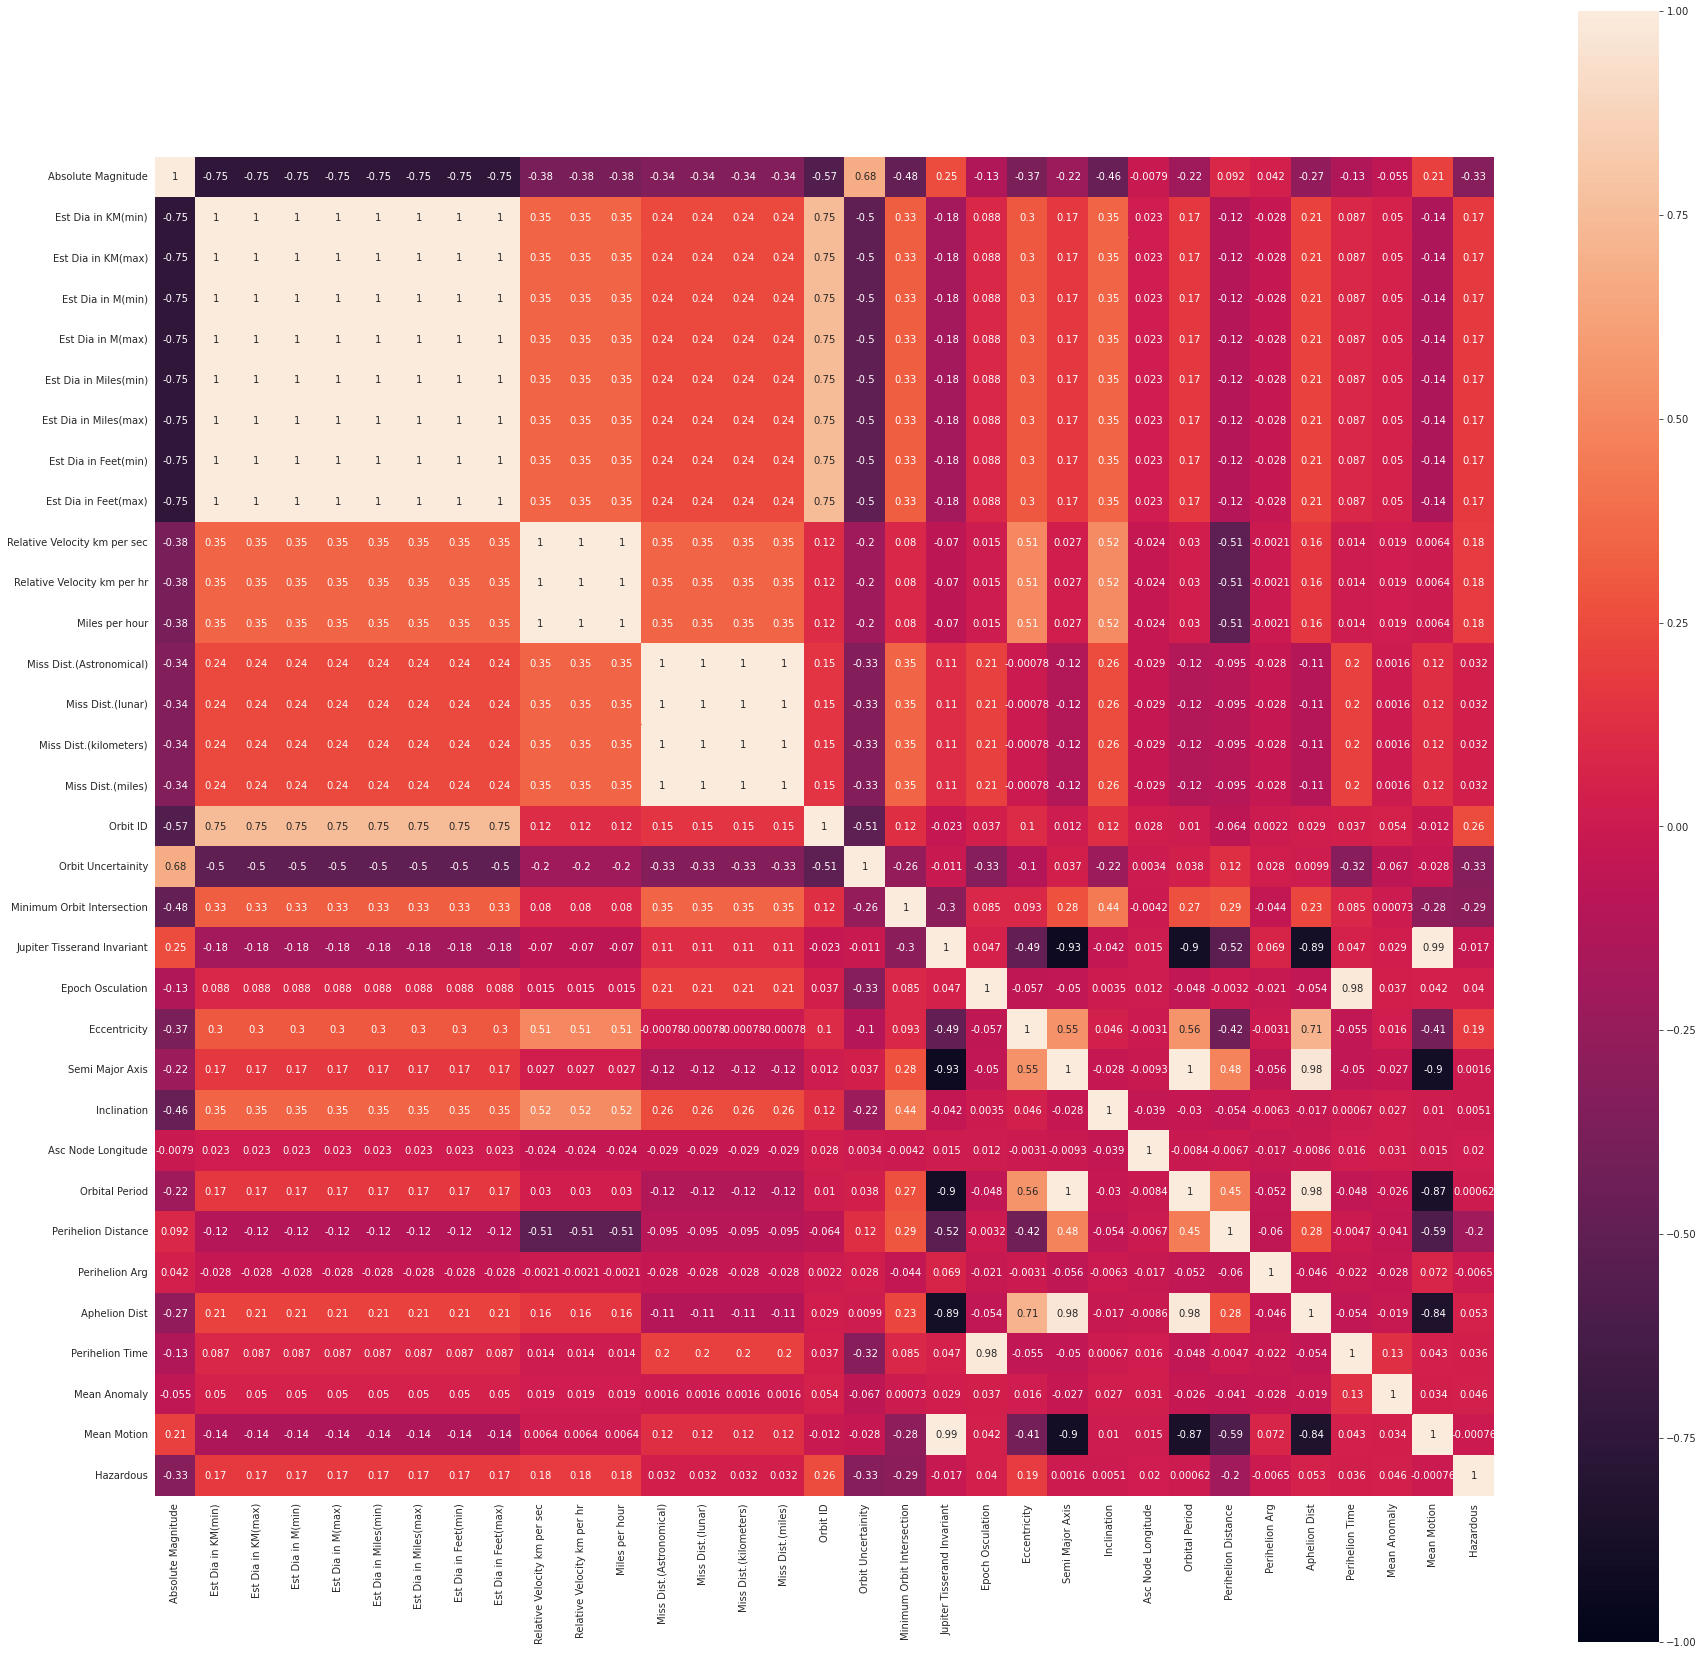

In [280]:
#plotting the correrations in the train dataset , to check for the positive and negative correrations
plt.figure(figsize=(30,30))
sns.heatmap(train_data.corr(),annot=True,vmax=1,vmin=-1,square=True,cbar="red")
plt.show()

In [281]:
#checking the correration 
train_data.corr()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Absolute Magnitude,1.000000,-0.745953,-0.745953,-0.745953,-0.745953,-0.745953,-0.745953,-0.745953,-0.745953,-0.384736,-0.384736,-0.384736,-0.339483,-0.339483,-0.339483,-0.339483,-0.572665,0.675486,-0.482525,0.251860,-0.128605,-0.371325,-0.221756,-0.462873,-0.007935,-0.216278,0.092343,0.042204,-0.266718,-0.126949,-0.055466,0.208154,-0.326416
Est Dia in KM(min),-0.745953,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.347837,0.347837,0.347837,0.238854,0.238854,0.238854,0.238854,0.746404,-0.500446,0.325252,-0.184338,0.087862,0.303681,0.168375,0.347872,0.022646,0.166143,-0.115447,-0.027873,0.213993,0.087179,0.050410,-0.143728,0.174192
Est Dia in KM(max),-0.745953,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.347837,0.347837,0.347837,0.238854,0.238854,0.238854,0.238854,0.746404,-0.500446,0.325252,-0.184338,0.087862,0.303681,0.168375,0.347872,0.022646,0.166143,-0.115447,-0.027873,0.213993,0.087179,0.050410,-0.143728,0.174192
Est Dia in M(min),-0.745953,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.347837,0.347837,0.347837,0.238854,0.238854,0.238854,0.238854,0.746404,-0.500446,0.325252,-0.184338,0.087862,0.303681,0.168375,0.347872,0.022646,0.166143,-0.115447,-0.027873,0.213993,0.087179,0.050410,-0.143728,0.174192
Est Dia in M(max),-0.745953,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.347837,0.347837,0.347837,0.238854,0.238854,0.238854,0.238854,0.746404,-0.500446,0.325252,-0.184338,0.087862,0.303681,0.168375,0.347872,0.022646,0.166143,-0.115447,-0.027873,0.213993,0.087179,0.050410,-0.143728,0.174192
Est Dia in Miles(min),-0.745953,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.347837,0.347837,0.347837,0.238854,0.238854,0.238854,0.238854,0.746404,-0.500446,0.325252,-0.184338,0.087862,0.303681,0.168375,0.347872,0.022646,0.166143,-0.115447,-0.027873,0.213993,0.087179,0.050410,-0.143728,0.174192
Est Dia in Miles(max),-0.745953,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.347837,0.347837,0.347837,0.238854,0.238854,0.238854,0.238854,0.746404,-0.500446,0.325252,-0.184338,0.087862,0.303681,0.168375,0.347872,0.022646,0.166143,-0.115447,-0.027873,0.213993,0.087179,0.050410,-0.143728,0.174192
Est Dia in Feet(min),-0.745953,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.347837,0.347837,0.347837,0.238854,0.238854,0.238854,0.238854,0.746404,-0.500446,0.325252,-0.184338,0.087862,0.303681,0.168375,0.347872,0.022646,0.166143,-0.115447,-0.027873,0.213993,0.087179,0.050410,-0.143728,0.174192
Est Dia in Feet(max),-0.745953,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.347837,0.347837,0.347837,0.238854,0.238854,0.238854,0.238854,0.746404,-0.500446,0.325252,-0.184338,0.087862,0.303681,0.168375,0.347872,0.022646,0.166143,-0.115447,-0.027873,0.213993,0.087179,0.050410,-0.143728,0.174192
Relative Velocity km per sec,-0.384736,0.347837,0.347837,0.347837,0.347837,0.347837,0.347837,0.347837,0.347837,1.000000,1.000000,1.000000,0.347999,0.347999,0.347999,0.347999,0.116243,-0.203892,0.079705,-0.069972,0.015000,0.505179,0.026960,0.515922,-0.024109,0.029991,-0.512220,-0.002092,0.159301,0.013902,0.018713,0.006395,0.180651


In [282]:
#use describe function to get statistics about the columns in the train datasets 
train_data.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3.280000e+03,3.280000e+03,3280.000000,3280.000000,3280.000000,3280.000000,3.280000e+03,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3.280000e+03,3280.000000,3280.000000,3280.000000
mean,22.287687,0.197258,0.441082,197.257811,441.081875,0.122570,0.274075,647.171318,1447.119060,13.920372,50113.339835,31138.480521,0.256423,99.748535,3.836033e+07,2.383600e+07,27.916463,3.509146,0.082819,5.035063,2.457726e+06,0.380313,1.404645,13.473183,171.349646,638.009022,0.818517,184.229431,1.990773,2.457733e+06,182.515907,0.731585,0.160976
std,2.874909,0.276904,0.619175,276.903528,619.175112,0.172060,0.384737,908.476171,2031.414475,7.328379,26382.165462,16392.851645,0.145418,56.567648,2.175424e+07,1.351746e+07,36.945659,3.080981,0.090752,1.217016,8.986110e+02,0.181697,0.520746,10.946805,103.435107,367.985549,0.240366,103.201339,0.949144,9.234603e+02,107.526383,0.335232,0.367564
min,14.400000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,1.000000,0.000000,0.000002,2.196000,2.450870e+06,0.007522,0.615920,0.020987,0.001941,176.557161,0.080744,0.006918,0.803765,2.450854e+06,0.003191,0.140832,0.000000
25%,20.200000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,8.422339,30320.421912,18839.931049,0.133305,51.855547,1.994211e+07,1.239145e+07,9.000000,0.000000,0.014642,4.050000,2.458000e+06,0.237908,1.007084,5.058736,81.585368,369.144783,0.640433,96.476530,1.273077,2.457813e+06,87.305972,0.455855,0.000000
50%,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,12.888534,46398.724088,28830.362753,0.264112,102.739666,3.951063e+07,2.455077e+07,16.000000,3.000000,0.048163,5.066000,2.458000e+06,0.368822,1.246093,10.389875,172.451944,508.070867,0.840137,190.594667,1.620061,2.457975e+06,188.482062,0.708563,0.000000
75%,24.500000,0.242412,0.542051,242.412481,542.050786,0.150628,0.336815,795.316564,1778.381902,17.972776,64701.994564,40203.303234,0.383891,149.333405,5.742920e+07,3.568485e+07,31.000000,6.000000,0.124345,5.988500,2.458000e+06,0.508973,1.672058,19.762841,252.790804,789.724437,1.000085,272.468434,2.447108,2.458110e+06,276.559414,0.975227,0.000000
max,32.100000,3.503926,7.835018,3503.926411,7835.017643,2.177238,4.868453,11495.821927,25705.439285,44.633747,160681.487851,99841.227826,0.499884,194.454910,7.478160e+07,4.646713e+07,453.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,3.658775,75.406667,359.905890,2556.242142,1.299832,359.929822,6.104579,2.458822e+06,359.917991,2.039000,1.000000


AxesSubplot(0.125,0.125;0.775x0.755)


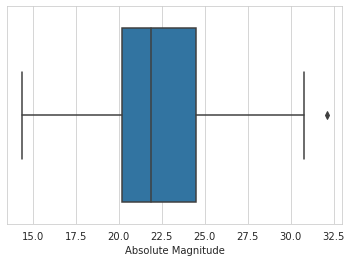

AxesSubplot(0.125,0.125;0.775x0.755)


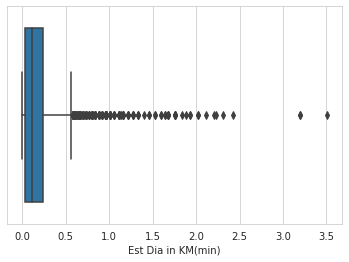

AxesSubplot(0.125,0.125;0.775x0.755)


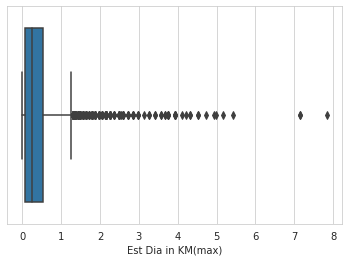

AxesSubplot(0.125,0.125;0.775x0.755)


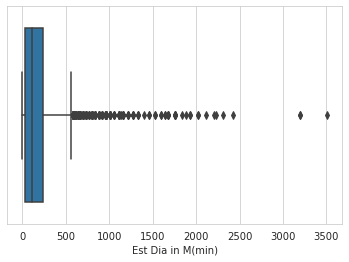

AxesSubplot(0.125,0.125;0.775x0.755)


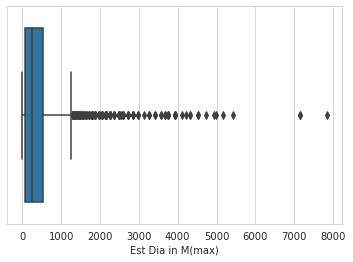

AxesSubplot(0.125,0.125;0.775x0.755)


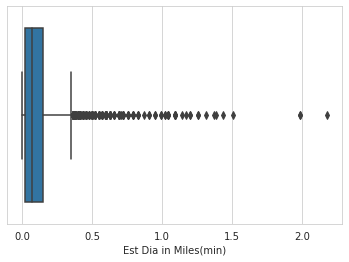

AxesSubplot(0.125,0.125;0.775x0.755)


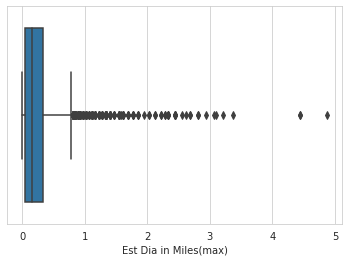

AxesSubplot(0.125,0.125;0.775x0.755)


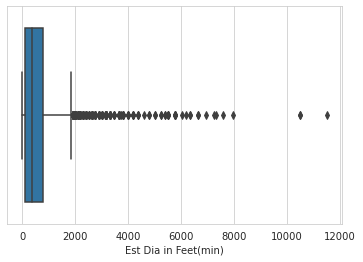

AxesSubplot(0.125,0.125;0.775x0.755)


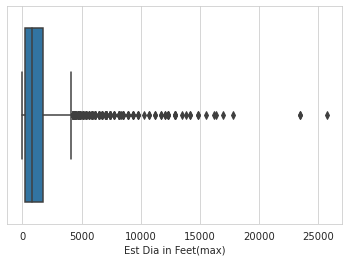

AxesSubplot(0.125,0.125;0.775x0.755)


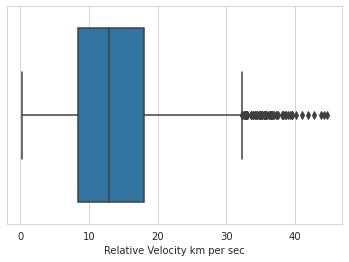

AxesSubplot(0.125,0.125;0.775x0.755)


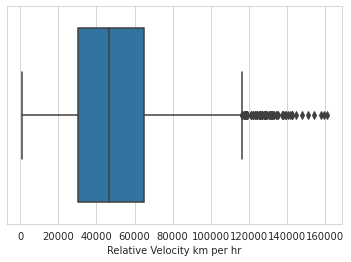

AxesSubplot(0.125,0.125;0.775x0.755)


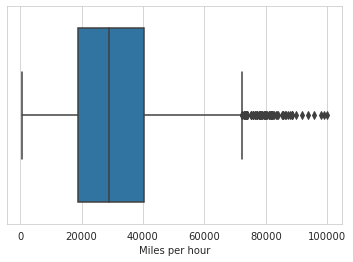

AxesSubplot(0.125,0.125;0.775x0.755)


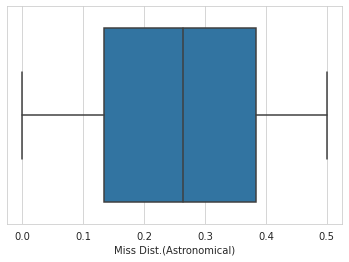

AxesSubplot(0.125,0.125;0.775x0.755)


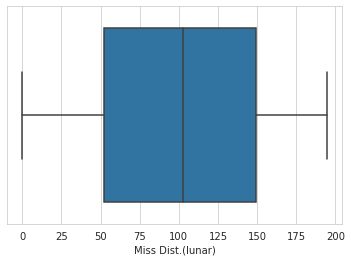

AxesSubplot(0.125,0.125;0.775x0.755)


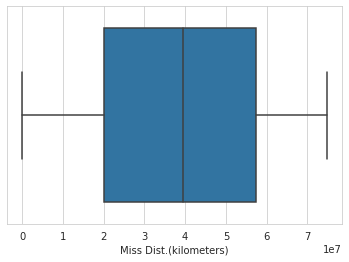

AxesSubplot(0.125,0.125;0.775x0.755)


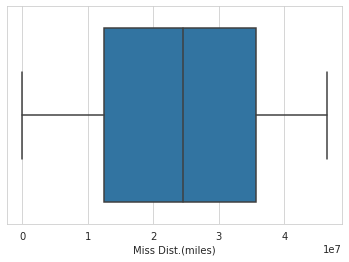

AxesSubplot(0.125,0.125;0.775x0.755)


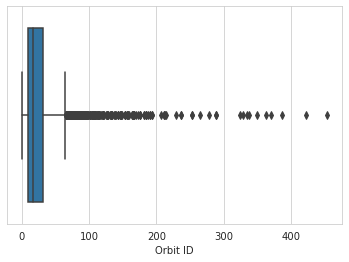

AxesSubplot(0.125,0.125;0.775x0.755)


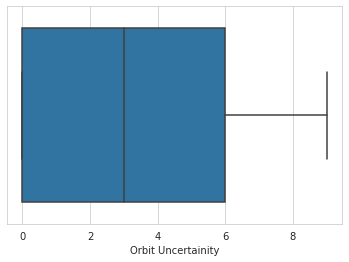

AxesSubplot(0.125,0.125;0.775x0.755)


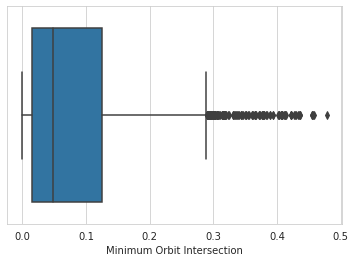

AxesSubplot(0.125,0.125;0.775x0.755)


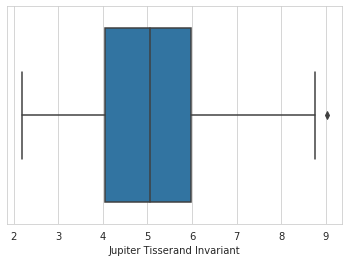

AxesSubplot(0.125,0.125;0.775x0.755)


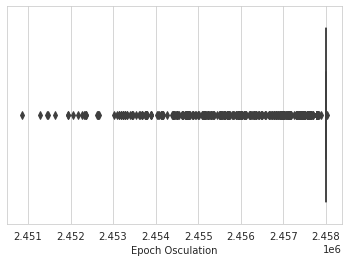

AxesSubplot(0.125,0.125;0.775x0.755)


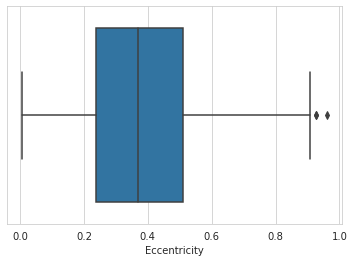

AxesSubplot(0.125,0.125;0.775x0.755)


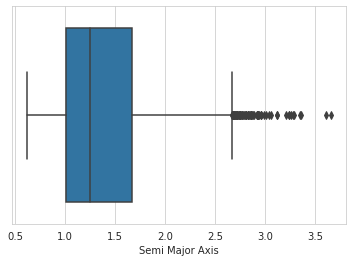

AxesSubplot(0.125,0.125;0.775x0.755)


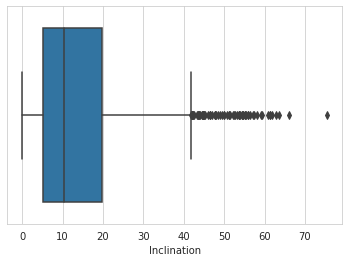

AxesSubplot(0.125,0.125;0.775x0.755)


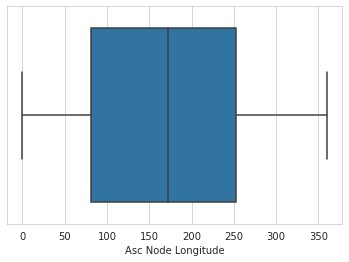

AxesSubplot(0.125,0.125;0.775x0.755)


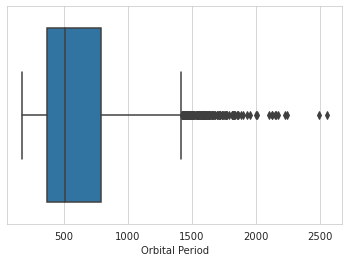

AxesSubplot(0.125,0.125;0.775x0.755)


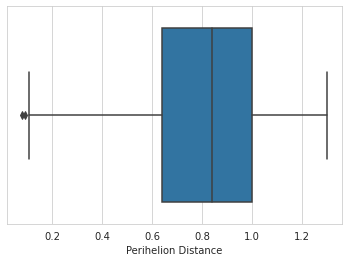

AxesSubplot(0.125,0.125;0.775x0.755)


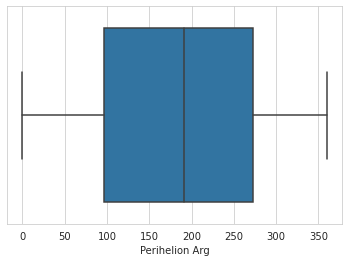

AxesSubplot(0.125,0.125;0.775x0.755)


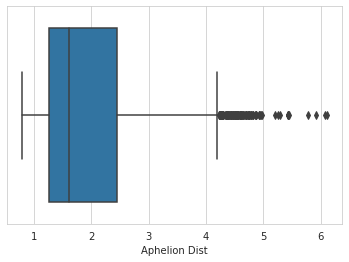

AxesSubplot(0.125,0.125;0.775x0.755)


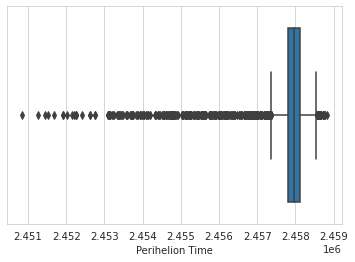

AxesSubplot(0.125,0.125;0.775x0.755)


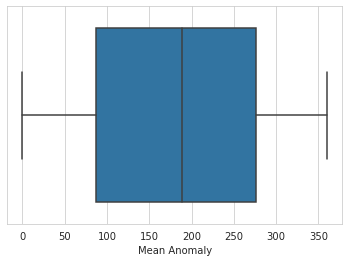

AxesSubplot(0.125,0.125;0.775x0.755)


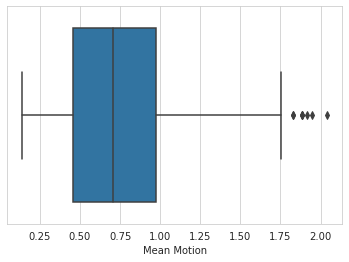

In [283]:
#plotting the outliers using boxplot
columns_name=list(train_data.columns.drop("Hazardous"))
for x in columns_name:
    print(sns.boxplot(train_data[x]))
    plt.show()

In [284]:
target=train_data['Hazardous'] # creating the target column
del train_data['Hazardous'] #deleting the target to have only the independent  features in the data ! 

In [285]:
train_data.shape , test_data.shape #looking into the dimension of the dataset 

((3280, 32), (1407, 32))

In [286]:
#using Stratified kfolds and manual Hyperparameter tuning of the LGBMClassifier algorithm
kf=StratifiedKFold(n_splits=50)
error=[]
sp=1
for train_index , test_index in kf.split(train_data ,target):
    x_train , x_test =train_data.iloc[train_index],train_data.iloc[test_index]
    y_train , y_test = target.iloc[train_index] , target.iloc[test_index]
    model=LGBMClassifier(learning_rate=0.22,n_estimators = 96,cat_smooth=10,metrics='accuracy', scale_pos_weight= 3.6,max_depth=16,num_leaves=49,reg_lambda=0.3)
    model.fit(x_train , y_train) #fitting the model
    y_preds_preds=model.predict(x_test)
    score=accuracy_score(y_true=y_test,y_pred=y_preds_preds)
    print("Split :",sp)
    print(score)
    sp+=1
    error.append(score)
score_final=np.mean(error)
print("The final score :",score_final)

Split : 1
0.9848484848484849
Split : 2
1.0
Split : 3
0.9848484848484849
Split : 4
1.0
Split : 5
1.0
Split : 6
0.9848484848484849
Split : 7
1.0
Split : 8
1.0
Split : 9
1.0
Split : 10
1.0
Split : 11
1.0
Split : 12
1.0
Split : 13
1.0
Split : 14
1.0
Split : 15
1.0
Split : 16
1.0
Split : 17
0.9848484848484849
Split : 18
1.0
Split : 19
1.0
Split : 20
1.0
Split : 21
1.0
Split : 22
1.0
Split : 23
1.0
Split : 24
1.0
Split : 25
0.9696969696969697
Split : 26
1.0
Split : 27
1.0
Split : 28
1.0
Split : 29
1.0
Split : 30
1.0
Split : 31
1.0
Split : 32
1.0
Split : 33
1.0
Split : 34
0.9846153846153847
Split : 35
0.9846153846153847
Split : 36
0.9846153846153847
Split : 37
0.9846153846153847
Split : 38
1.0
Split : 39
1.0
Split : 40
1.0
Split : 41
1.0
Split : 42
0.9846153846153847
Split : 43
1.0
Split : 44
1.0
Split : 45
0.9846153846153847
Split : 46
1.0
Split : 47
1.0
Split : 48
1.0
Split : 49
1.0
Split : 50
1.0
The final score : 0.9963356643356643


[[55  0]
 [ 0 10]]


<AxesSubplot:>

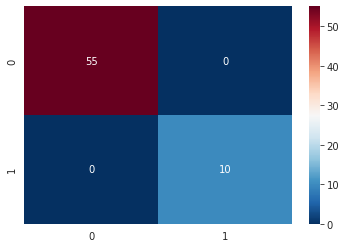

In [287]:
#plotting the confusion matrix to check the performance of the models 
model_measure_performance=confusion_matrix(y_test,y_preds_preds)
print(model_measure_performance)
sns.heatmap(model_measure_performance,annot=True,cmap="RdBu_r")

In [288]:
#plotting the classification reports to check more information about the performance of the model
target_names=['0','1']
classification_report_check=classification_report(y_true=y_test,y_pred=y_preds_preds,target_names=target_names)
print(classification_report_check)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        10

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [289]:
#serilize and save the model to be used in deployment and prediction of the target from the unseen data 
pickle.dump(model,open("../Models/model_trained.pickle","wb"))

In [290]:
#load the model to make predictions 
model_to_make_pred=pickle.load(open("../Models/model_trained.pickle","rb"))

In [291]:
#Making predictions from the test dataset and make submission 
predictions_end=model_to_make_pred.predict(test_data)
pred_end=pd.DataFrame(predictions_end)
sub['Hazardous']=pred_end
sub.to_csv("dphi_meteroite_challenge_datasplint_#61.csv",index=False)
sub.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,25.1,0.025384,0.056760,25.383703,56.759685,0.015773,0.035269,83.279868,186.219446,4.581412,16493.084293,10248.161182,0.176349,68.599678,26381404.0,16392644.0,7,3,0.025396,6.258,2458000.5,0.182807,0.960067,6.856692,196.306187,343.597890,0.784560,128.552100,1.135574,2.457956e+06,46.850634,1.047736,0
1,20.6,0.201630,0.450858,201.629919,450.858206,0.125287,0.280150,661.515505,1479.193637,29.759711,107134.958747,66569.497006,0.145379,56.552307,21748342.0,13513793.0,29,0,0.034667,4.638,2454749.5,0.738662,1.313190,3.908082,3.756316,549.654306,0.343186,271.386905,2.283193,2.454734e+06,10.117600,0.654957,1
2,23.7,0.048368,0.108153,48.367649,108.153351,0.030054,0.067203,158.686517,354.833839,8.778408,31602.267857,19636.420269,0.034218,13.310944,5118994.5,3180795.5,13,7,0.031394,2.963,2458000.5,0.642603,2.829978,5.858230,157.020347,1738.893236,1.011426,344.511853,4.648529,2.458717e+06,211.595601,0.207028,0
3,18.4,0.555335,1.241767,555.334912,1241.766613,0.345069,0.771598,1821.964991,4074.037573,11.858580,42690.889350,26526.458441,0.313142,121.812263,46845384.0,29108374.0,92,0,0.065960,5.338,2458000.5,0.474092,1.153596,4.159055,337.201487,452.562947,0.606685,168.443407,1.700507,2.458040e+06,328.724516,0.795469,0
4,19.3,0.366906,0.820427,366.906138,820.427065,0.227985,0.509790,1203.760332,2691.689932,15.185391,54667.407014,33968.200764,0.383369,149.130737,57351264.0,35636424.0,23,0,0.132537,4.762,2458000.5,0.372837,1.342777,19.822195,64.003749,568.335056,0.842140,151.941979,1.843415,2.457925e+06,47.816955,0.633429,0
